In [1]:
import numpy as np
import pandas as pd

dia = pd.read_csv("DiamondPricesData.csv")
dia.head(3)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [2]:
dia.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [3]:
dia.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

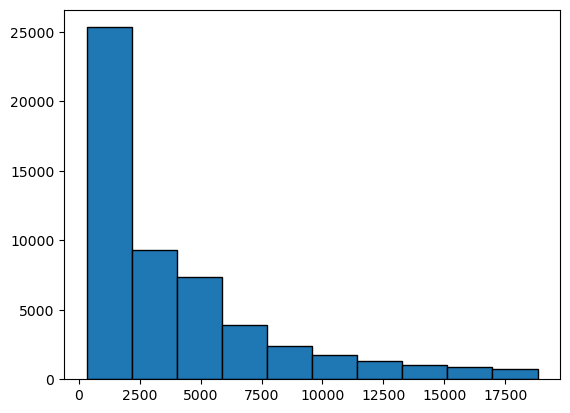

In [4]:
# distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(dia['price'], edgecolor='black')

In [5]:
# determine if it is categorical/continuous
dia.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

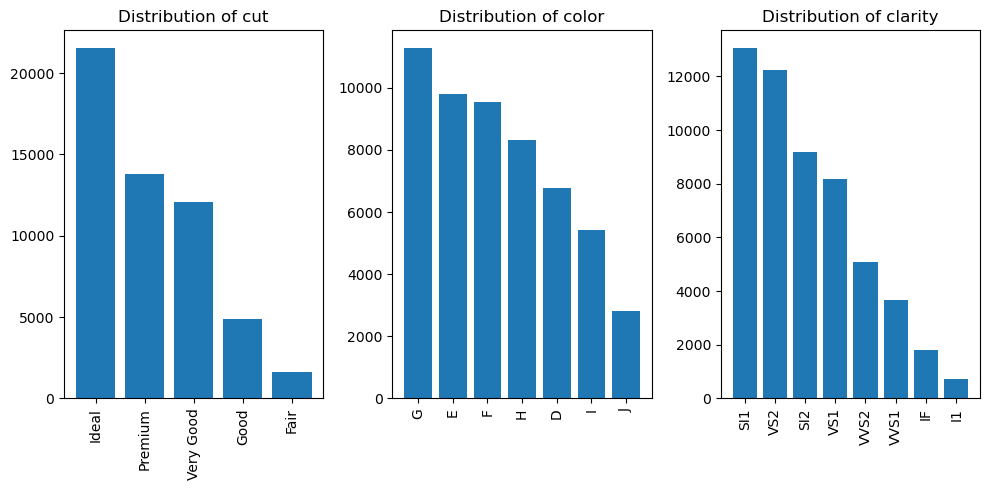

In [6]:
# Visualize distribution of all the Categorical Predictor variables in the data using bar plots
cate_predict = ['cut','color','clarity']
fig, axes = plt.subplots(1,3,figsize=(10,5))
axes = axes.flatten()

for i, cat in enumerate(cate_predict):
    axes[i].bar(dia[cat].value_counts().index,dia[cat].value_counts())
    axes[i].set_title(f"Distribution of {cat}")
    axes[i].tick_params(axis='x', rotation = 90)

plt.tight_layout()
plt.show()

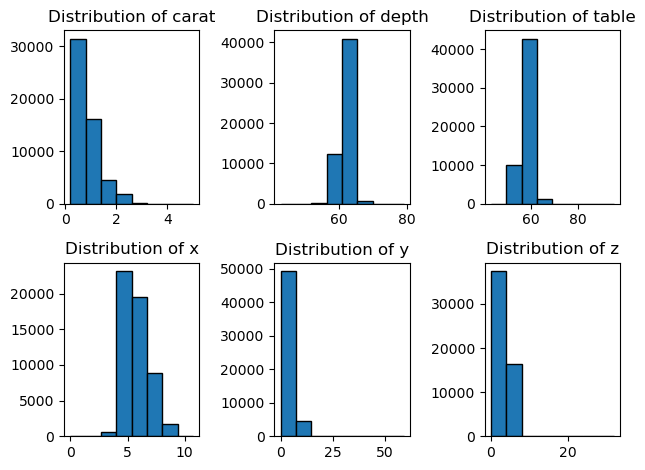

In [7]:
# Visualize distribution of all the Continuous Predictor variables in the data using histograms
cont_predict = ['carat','depth','table','x','y','z']
fig, axes = plt.subplots(2,3)
axes = axes.flatten()

for i, con in enumerate(cont_predict):
    axes[i].hist(dia[con], bins=8, edgecolor = 'black')
    axes[i].set_title(f"Distribution of {con}")
    
plt.tight_layout()
plt.show()

In [8]:
# Replacing missing value for categorical data using MODE value
dia['color'].fillna(dia['color'].mode()[0], inplace = True)

# Replacing missing value for continuous data using median value
dia['depth'].fillna(dia['depth'].median(), inplace = True)

# Checking missing values again after treatment
dia.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Visual exploration of relationship between variables
### Continuous Vs Continuous ---- Scatter Plot
### Categorical Vs Continuous---- Box Plot
### Categorical Vs Categorical---- Grouped Bar Plots

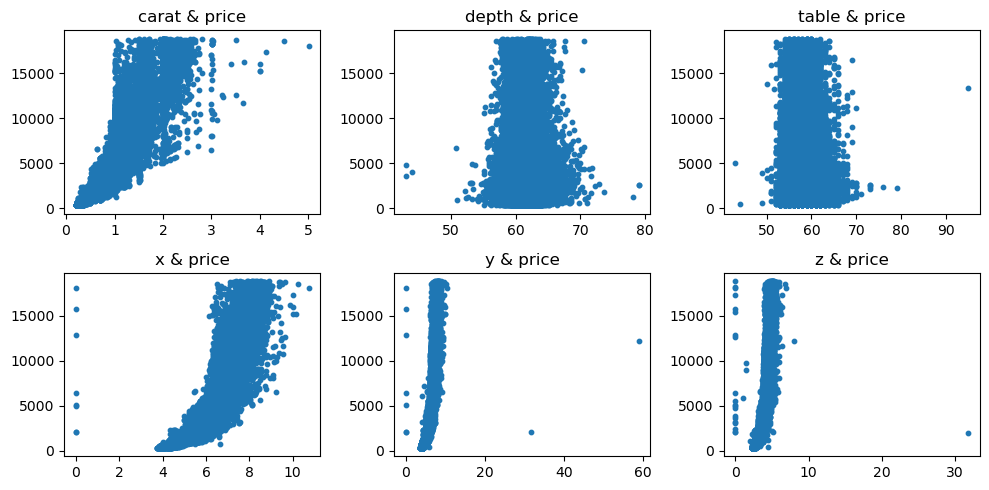

In [42]:
fig, axes = plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten()

for i, col in enumerate(cont_predict):
    axes[i].scatter(dia[col], dia['price'], s=10)
    axes[i].set_title(f'{col} & price')

plt.tight_layout()
plt.show()

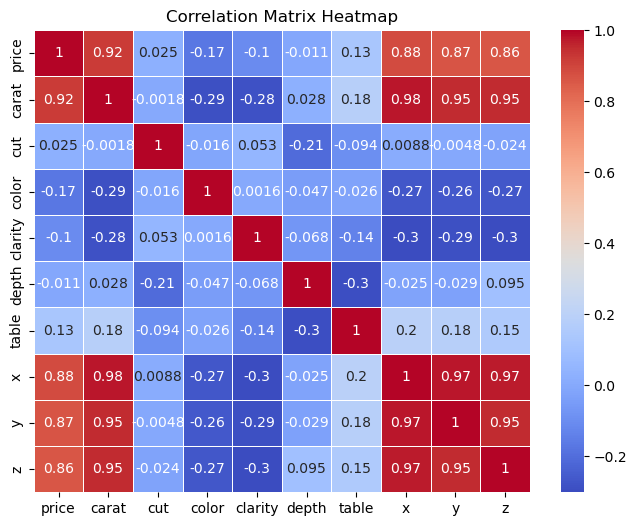

In [43]:
corr_matrix = dia.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Converting the ordinal variable to numeric using mapping

In [9]:
dia['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
dia['cut'].replace({'Good':1,
                    'Very Good':2,
                    'Fair':3,
                    'Ideal':4,
                    'Premium':5}, inplace = True)

In [11]:
dia['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
dia['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [13]:
dia['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [14]:
dia['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [15]:
dia.head(5)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,4,6,3,61.5,55.0,3.95,3.98,2.43
1,326,0.21,5,6,2,59.8,61.0,3.89,3.84,2.31
2,327,0.23,1,6,4,56.9,65.0,4.05,4.07,2.31
3,334,0.29,5,2,5,62.4,58.0,4.20,4.23,2.63
4,335,0.31,1,1,3,63.3,58.0,4.34,4.35,2.75


# Machine Learning Models

### LinearRegression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

X=dia[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y=dia['price']

n_splits = 5
train_R2_list = []
test_R2_list = []
train_MSE_list = []
test_MSE_list = []

for _ in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    LREG = LinearRegression().fit(X_train, y_train)
    y_predict = LREG.predict(X_test)
    
    train_R2_Score = r2_score(y_train, LREG.predict(X_train))
    test_R2_Score = r2_score(y_test, y_predict)
    train_R2_list.append(train_R2_Score)
    test_R2_list.append(test_R2_Score)
    
    train_MSE_Score = mean_squared_error(y_train, LREG.predict(X_train))
    test_MSE_Score = mean_squared_error(y_test, y_predict)
    train_MSE_list.append(train_MSE_Score)
    test_MSE_list.append(test_MSE_Score)    
    
avg_train_R2 = np.mean(train_R2_list)
avg_test_R2 = np.mean(test_R2_list)
print(f'The average training R2 is {avg_train_R2}')
print(f'The average test R2 is {avg_test_R2}')

avg_train_MSE = np.mean(train_MSE_list)
avg_test_MSE = np.mean(test_MSE_list)
print(f'The average training MSE is {avg_train_MSE}')
print(f'The average test MSE is {avg_test_MSE}')

The average training R2 is 0.8934752776745197
The average test R2 is 0.8945325545700543
The average training MSE is 1695095.3540028245
The average test MSE is 1677900.1967521678


In [17]:
from sklearn.model_selection import KFold, cross_val_score

X=dia[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y=dia['price']
    
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
model1 = LinearRegression()
    
cv_r2 = cross_val_score(model1, X, y, cv= kf, scoring ='r2')

neg_cv_MSE = cross_val_score(model1, X, y, cv= kf, scoring ='neg_mean_squared_error')
cv_MSE = - neg_cv_MSE

print(f'The 10-fold cv training R2 is {cv_r2.round(2)}')
print(f'The 10-fold cv test R2 is {cv_r2.mean()}')

print(f'The 10-fold cv training MSE is {cv_MSE.round(2)}')
print(f'The 10-fold cv test MSE is {cv_MSE.mean()}')

The 10-fold cv training R2 is [0.89 0.89 0.89 0.89 0.9 ]
The 10-fold cv test R2 is 0.893525351602818
The 10-fold cv training MSE is [1691850.41 1662213.7  1781706.2  1726850.6  1610087.79]
The 10-fold cv test MSE is 1694541.738801016


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

n_splits = 5
train_R2_list = []
test_R2_list = []
train_MSE_list = []
test_MSE_list = []

model2 = DecisionTreeRegressor()

for _ in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    DT = model2.fit(X_train, y_train)
    y_predict = DT.predict(X_test)
    
    train_R2_Score = r2_score(y_train, DT.predict(X_train))
    test_R2_Score = r2_score(y_test, y_predict)
    train_R2_list.append(train_R2_Score)
    test_R2_list.append(test_R2_Score)
    
    train_MSE_Score = mean_squared_error(y_train, DT.predict(X_train))
    test_MSE_Score = mean_squared_error(y_test, y_predict)
    train_MSE_list.append(train_MSE_Score)
    test_MSE_list.append(test_MSE_Score)    
    
avg_train_R2 = np.mean(train_R2_list)
avg_test_R2 = np.mean(test_R2_list)
print(f'The average training R2 is {avg_train_R2}')
print(f'The average test R2 is {avg_test_R2}')

avg_train_MSE = np.mean(train_MSE_list)
avg_test_MSE = np.mean(test_MSE_list)
print(f'The average training MSE is {avg_train_MSE}')
print(f'The average test MSE is {avg_test_MSE}')

The average training R2 is 0.9999963875815376
The average test R2 is 0.9649966814918207
The average training MSE is 57.34456715574625
The average test MSE is 560711.9542046033


In [19]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    
cv_r2 = cross_val_score(model2, X, y, cv= kf, scoring ='r2')

neg_cv_MSE = cross_val_score(model2, X, y, cv= kf, scoring ='neg_mean_squared_error')
cv_MSE = - neg_cv_MSE

print(f'The 10-fold cv training R2 is {cv_r2.round(2)}')
print(f'The 10-fold cv test R2 is {cv_r2.mean()}')

print(f'The 10-fold cv training MSE is {cv_MSE.round(2)}')
print(f'The 10-fold cv test MSE is {cv_MSE.mean()}')

The 10-fold cv training R2 is [0.97 0.97 0.96 0.97 0.97]
The 10-fold cv test R2 is 0.9661715557817967
The 10-fold cv training MSE is [523853.98 512611.5  560436.85 551685.8  543206.29]
The 10-fold cv test MSE is 538358.8847191324


In [20]:
#get the pruned tree
path = model2.cost_complexity_pruning_path(X,y)
ccp_alphas = path.ccp_alphas[:-1]
ccp_alphas = ccp_alphas[ccp_alphas > 0]

print(len(ccp_alphas))

39183


test_MSE_list = []

for i in ccp_alphas:
    model2 = DecisionTreeRegressor(max_depth=10, ccp_alpha = i)
    neg_cv_MSE = cross_val_score(model2, X, y, cv= kf, scoring ='neg_mean_squared_error')
    cv_MSE = - neg_cv_MSE
    test_MSE_list.append(cv_MSE.mean())

best_ccp_alpha_idx = np.argmin(test_MSE_list) 
best_ccp_alpha = ccp_alphas[best_ccp_alpha_idx]

best_tree = DecisionTreeRegressor(max_depth=10, ccp_alpha = best_ccp_alpha)
best_tree.fit(X, y)

#plot the importance graph
feature_importance = best_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature":X.columns,
    "importance":feature_importance
}).sort_values(by = 'importance', ascending = False)

top5_df = feature_importance_df.head(5)

plt.figure(figsize=(7,3))
plt.barh(top5_df["feature"], top5_df["importance"])
plt.gca().invert_yaxis()
plt.show()

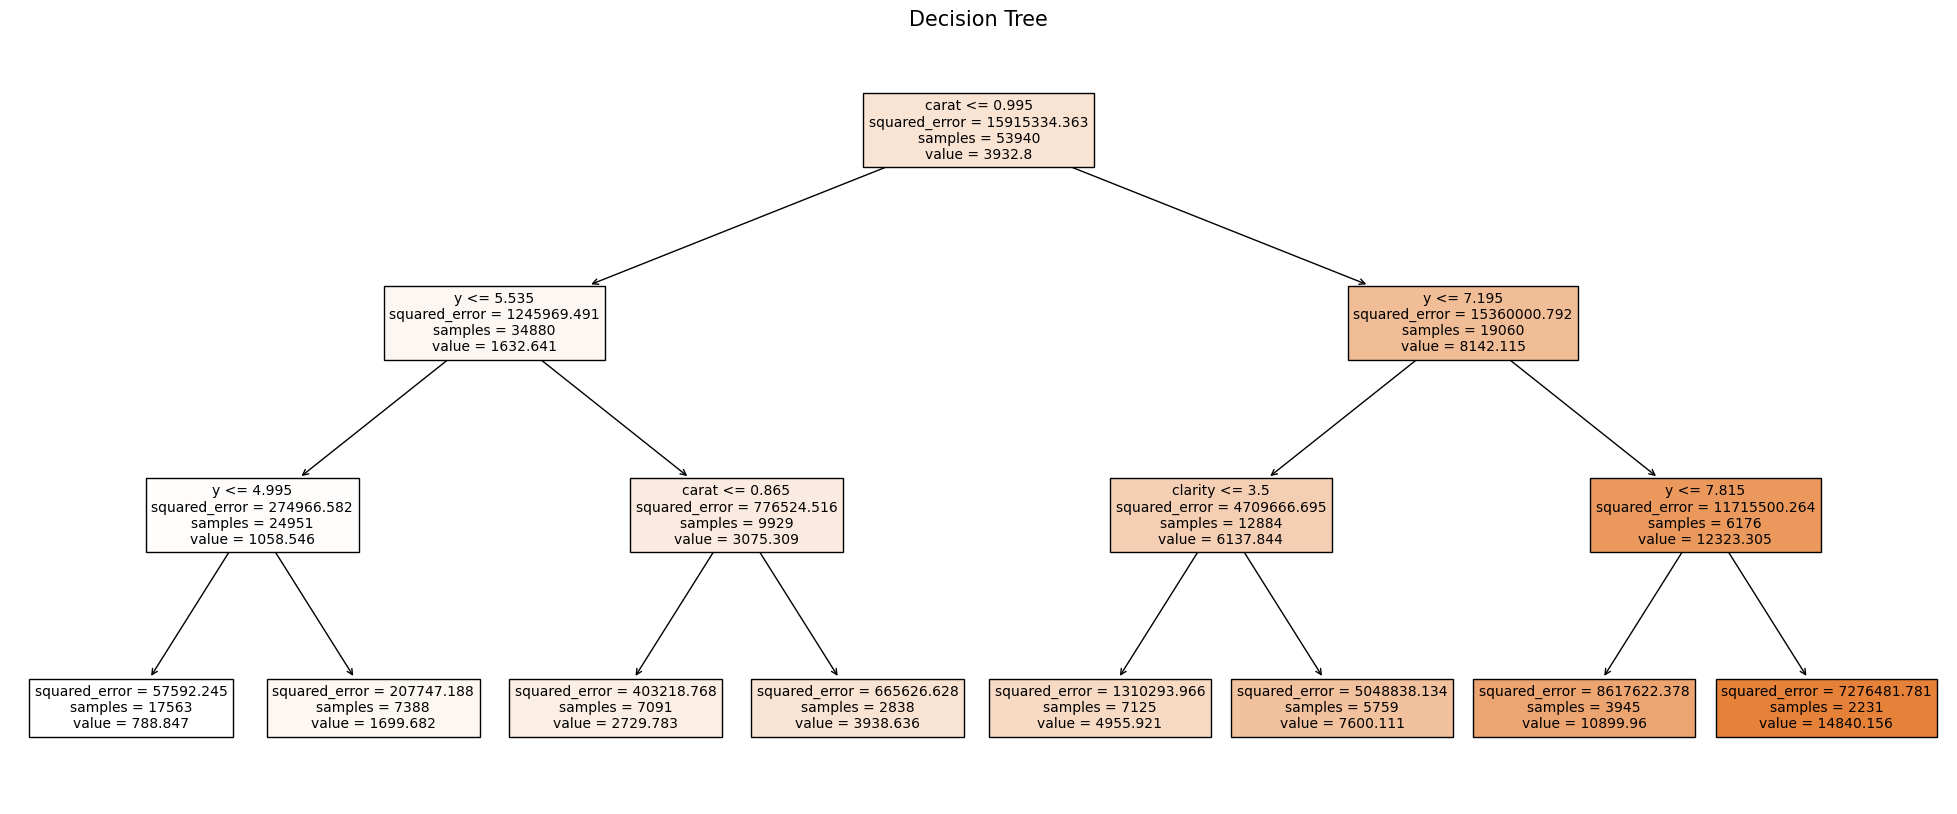

In [32]:
from sklearn.tree import plot_tree

model2 = DecisionTreeRegressor(max_depth = 3)
best_tree = model2.fit(X,y)

plt.figure(figsize=(25,10))
plot_tree(best_tree, filled = True, fontsize = 10, feature_names = X.columns.tolist())
plt.title('Decision Tree',fontsize =15)
plt.show()